# Importing Necessary Packages

In [1]:
#packages for data data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
# Importing Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM,Bidirectional
# Importing evaluation modules
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
#data scalling
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()

# Reading the Data

In [2]:
df = pd.read_excel('(미디어에버) BioParticle Counter 6개월 측정 20230314.xlsx',
                   sheet_name='data',
                  header=1)

In [3]:
df.head()

,Unnamed: 0,Day,Time,Bio,Dust,T,H,PM2.5
0,NaN,NaT,NaN,#/L,#/L,NaN,NaN,NaN
1,NaN,2022-05-01,00:03:29,11,34254,25.5,27.0,30.984
2,NaN,2022-05-01,00:07:36,19,33980,25.5,27.0,30.750
3,NaN,2022-05-01,00:11:43,28,33378,25.5,27.0,30.235
4,NaN,2022-05-01,00:15:50,47,33092,25.5,27.0,29.990


In [4]:
#setting path to store images
import os
dir=os.listdir()
if "pm" in dir:
    pass
else:
    # Specify the directory path
    directory_path = "./pm"
    # Use the os.makedirs() function to create the directory
    os.makedirs(directory_path)

# Data Preparation

### Dropping Un-necessary Columns

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)

In [6]:
df['Dust']=df['Dust'].astype(int)
df['Bio']=df['Bio'].astype(int)

In [7]:
df['Date_Time']=df['Day'].astype(str)+' '+df['Time'].astype(str)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# Data Visualizations

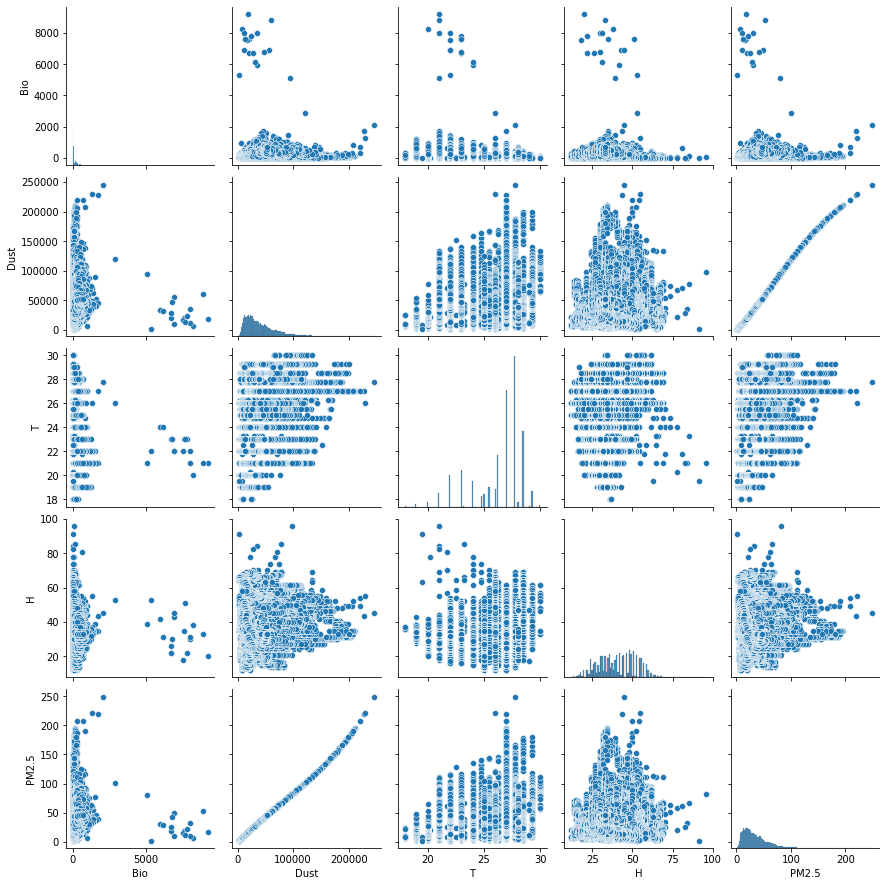

In [8]:
sns.pairplot(df)

# Feature Engineering

In [9]:
#converting date_time to numerical value
df['Date_Time'] =df['Date_Time'].values.astype(np.int64) // 10 ** 9
df.drop(['Day','Time'],axis=1,inplace=True)

### Features Correlation

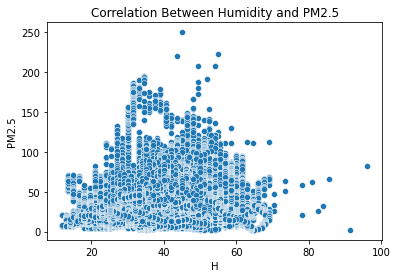

Pearson Correlation : 0.09812844081702435


In [10]:
sns.scatterplot(x=df['H'],y=df['PM2.5'])
plt.xlabel('H')
plt.ylabel('PM2.5')
plt.title('Correlation Between Humidity and PM2.5')
plt.savefig('./pm/Correlation Between Humidity and PM2.5.jpeg')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['H'],df['PM2.5'])[0][1])

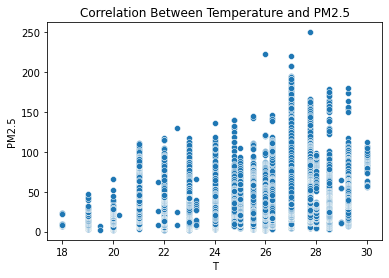

Pearson Correlation : 0.11350918067415086


In [11]:
sns.scatterplot(x=df['T'],y=df['PM2.5'])
plt.xlabel('T')
plt.ylabel('PM2.5')
plt.title('Correlation Between Temperature and PM2.5')
plt.savefig('./pm/Correlation Between Temperature and PM2.5.jpeg')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['T'],df['PM2.5'])[0][1])

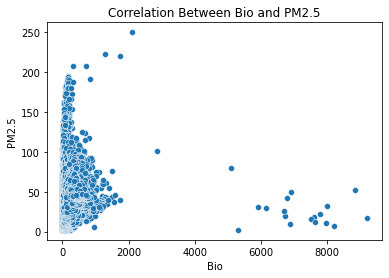

Pearson Correlation : 0.11075081066413414


In [12]:
sns.scatterplot(x=df['Bio'],y=df['PM2.5'])
plt.xlabel('Bio')
plt.ylabel('PM2.5')
plt.title('Correlation Between Bio and PM2.5')
plt.savefig('./pm/Correlation Between Bio and PM2.5.jpeg')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['Bio'],df['PM2.5'])[0][1])

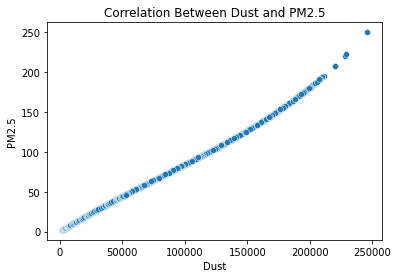

Pearson Correlation : 0.999415875119069


In [13]:
sns.scatterplot(x=df['Dust'],y=df['PM2.5'])
plt.xlabel('Dust')
plt.ylabel('PM2.5')
plt.title('Correlation Between Dust and PM2.5')
plt.savefig('./pm/Correlation Between Dust and PM2.5.jpeg')
plt.show()
np.corrcoef(df['Dust'],df['PM2.5'])[0][1]
print('Pearson Correlation :',np.corrcoef(df['Dust'],df['PM2.5'])[0][1])

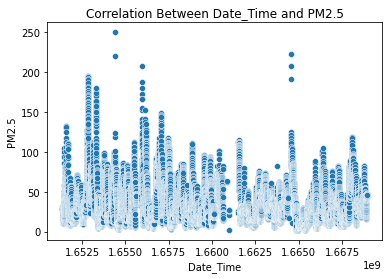

Pearson Correlation : -0.10511572055576339


In [14]:
sns.scatterplot(x=df['Date_Time'],y=df['PM2.5'])
plt.xlabel('Date_Time')
plt.ylabel('PM2.5')
plt.title('Correlation Between Date_Time and PM2.5')
plt.savefig('./pm/Correlation Between Date_Time and PM2.5.jpeg')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['Date_Time'],df['PM2.5'])[0][1])

## Selecting on Relevant Features

In [15]:
# the Dust is the only relevant feature to our target variable

In [16]:
X=df[['Dust']]
y=df['PM2.5']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Willmote Index

In [18]:
def willmott_index(observed, predicted):
    mean_observed = np.mean(observed)
    numerator = np.sum(np.abs(observed - predicted))
    denominator = np.sum(np.abs(observed - mean_observed))
    wi = (1 - (numerator / denominator))
    return wi

In [19]:
train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []
wi_l = []
cv_scores=[]

In [20]:
models_names=['Ridge','LR','KNN Regressor','RF Regressor','DT Regressor','SGD Regressor','SV Regressor']

In [21]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Create an instance of Elastic Net regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, learning_rate=0.1)

import xgboost as xgb

# Create an instance of XGBoost regressor
xgboost = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)

+ ==================================================================================================== +
			1-For Ridge The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.7525293904272627
--------------------------------------------------
Mean absolute error (MAE) :  0.4908049143452509
--------------------------------------------------
R2 score :  0.9989075890349477
--------------------------------------------------
CV Score :  [0.99796598 0.99900774 0.99927858 0.99871086 0.9991162 ]
--------------------------------------------------
Willmott's Index: 0.9718108823230315
--------------------------------------------------


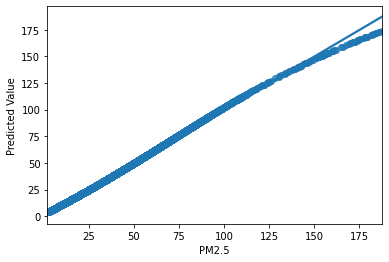

							-----------------------------------------------------------
							 Time for detection (Ridge) : 1.681 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For LinearRegression The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.7525293904272351
--------------------------------------------------
Mean absolute error (MAE) :  0.49080491434524515
--------------------------------------------------
R2 score :  0.9989075890349478
--------------------------------------------------
CV Score :  [0.99796598 0.99900774 0.99927858 0.99871086 0.9991162 ]
--------------------------------------------------
Willmott's Index: 0.9718108823230318
--------------------------------------------------


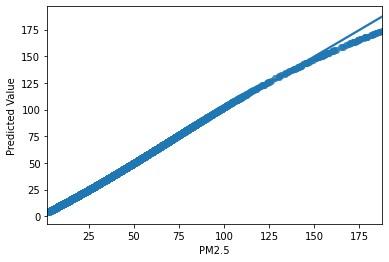

							-----------------------------------------------------------
							 Time for detection (LinearRegression) : 1.58 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For KNeighborsRegressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.03487196434535544
--------------------------------------------------
Mean absolute error (MAE) :  0.0032174596191315414
--------------------------------------------------
R2 score :  0.999997654194813
--------------------------------------------------
CV Score :  [0.99965561 0.99999922 0.99999994 0.99997276 0.99999994]
--------------------------------------------------
Willmott's Index: 0.9998152069281018
--------------------------------------------------


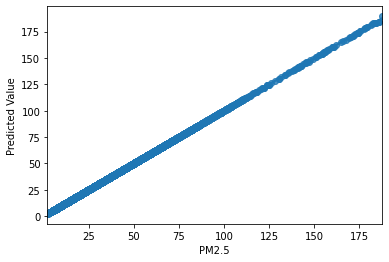

							-----------------------------------------------------------
							 Time for detection (KNeighborsRegressor) : 1.935 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.015474214621659276
--------------------------------------------------
Mean absolute error (MAE) :  0.0017280346929798955
--------------------------------------------------
R2 score :  0.9999995380910786
--------------------------------------------------
CV Score :  [0.9998107  0.99999886 0.99999997 0.99999769 0.99999998]
--------------------------------------------------
Willmott's Index: 0.9999007512518996
--------------------------------------------------


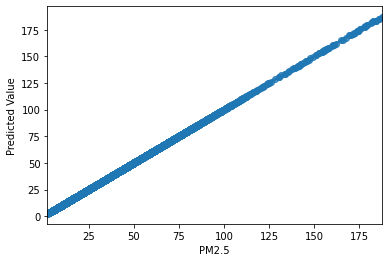

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 50.752 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For Decision Tree The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.019625234608752262
--------------------------------------------------
Mean absolute error (MAE) :  0.0019413613223557193
--------------------------------------------------
R2 score :  0.9999992570341832
--------------------------------------------------
CV Score :  [0.9998161  0.99999904 0.99999996 0.99999766 0.99999997]
--------------------------------------------------
Willmott's Index: 0.9998884989510702
--------------------------------------------------


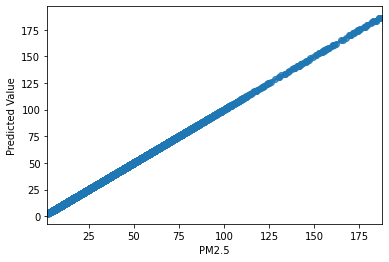

							-----------------------------------------------------------
							 Time for detection (Decision Tree) : 2.468 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			6-For SGD Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  2.7884623634907405e+17
--------------------------------------------------
Mean absolute error (MAE) :  2.296939615182964e+17
--------------------------------------------------
R2 score :  -1.499922059953852e+32
--------------------------------------------------
CV Score :  [-5.14318533e+31 -2.07664678e+30 -3.40662681e+31 -9.76995509e+31
 -1.13166523e+32]
--------------------------------------------------
Willmott's Index: -1.3192349794553348e+16
--------------------------------------------------


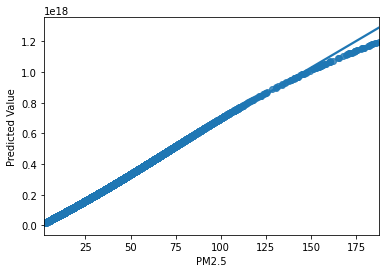

							-----------------------------------------------------------
							 Time for detection (SGD Regressor) : 6.222 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			7-For Lasso Regression The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.7525294044966098
--------------------------------------------------
Mean absolute error (MAE) :  0.49080491694803297
--------------------------------------------------
R2 score :  0.9989075889941001
--------------------------------------------------
CV Score :  [0.99796598 0.99900774 0.99927858 0.99871086 0.9991162 ]
--------------------------------------------------
Willmott's Index: 0.9718108821735421
--------------------------------------------------


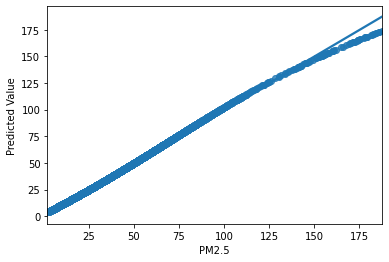

							-----------------------------------------------------------
							 Time for detection (Lasso Regression) : 1.694 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			8-For ElasticNet Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.752529391141901
--------------------------------------------------
Mean absolute error (MAE) :  0.4908049144774576
--------------------------------------------------
R2 score :  0.9989075890328729
--------------------------------------------------
CV Score :  [0.99796598 0.99900774 0.99927858 0.99871086 0.9991162 ]
--------------------------------------------------
Willmott's Index: 0.9718108823154382
--------------------------------------------------


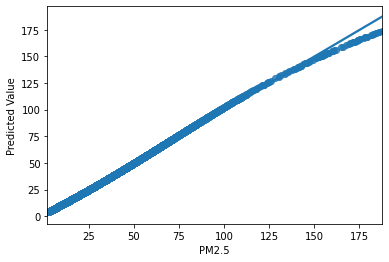

							-----------------------------------------------------------
							 Time for detection (ElasticNet Regressor) : 1.506 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			9-For Adaboost Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.019625250621191526
--------------------------------------------------
Mean absolute error (MAE) :  0.0019417384199610767
--------------------------------------------------
R2 score :  0.9999992570329708
--------------------------------------------------
CV Score :  [0.9998161  0.99999904 0.99999996 0.99999766 0.99999997]
--------------------------------------------------
Willmott's Index: 0.9998884772926709
--------------------------------------------------


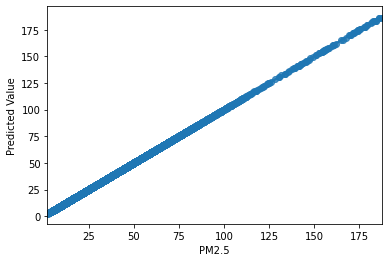

							-----------------------------------------------------------
							 Time for detection (Adaboost Regressor) : 81.365 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			10-For XGboost Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.06590464993800911
--------------------------------------------------
Mean absolute error (MAE) :  0.03355338375186734
--------------------------------------------------
R2 score :  0.999991621404321
--------------------------------------------------
CV Score :  [0.99980645 0.99999057 0.9999941  0.9999917  0.99999392]
--------------------------------------------------
Willmott's Index: 0.9980728793551229
--------------------------------------------------


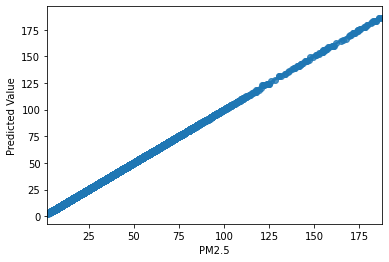

							-----------------------------------------------------------
							 Time for detection (XGboost Regressor) : 19.229 seconds...
							-----------------------------------------------------------



In [22]:
# Create an instance of Lasso regression
lasso = Lasso(alpha=0.1)
# check the performance on diffrent regressor
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('SGD Regressor', SGDRegressor()))
#models.append(('SV Regressor', SVR()))
models.append(('Lasso Regression',  Lasso(alpha=0.01)))
models.append(('ElasticNet Regressor',  ElasticNet(alpha=0.01, l1_ratio=0.05)))
models.append(('Adaboost Regressor', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, learning_rate=0.1)))
models.append(('XGboost Regressor', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)))

train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []
wi_l = []
cv_scores=[]

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    
    train_l.append(train)
    test_l.append(test)
    
    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_scores.append(scores)


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)
    print('CV Score : ', scores)
    print("-"*50)
    wi = willmott_index(y_test, predictions)
    print(f"Willmott's Index: {wi}")
    wi_l.append(wi)
    print("-"*50)
    wi = willmott_index(y_test, predictions)
    
    
    sns.regplot(x=y_test,y=predictions)
    plt.ylabel("Predicted Value")
    plt.savefig(f'./pm/{name} regplot.jpeg')
    plt.show()
        
        
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    


In [23]:
report = pd.DataFrame({ "Training Score": train_l,
                     "Testing Score": test_l, "MAE": mae_l,
                     "RMSE": rmse_l,
                     "R2 Score": r2_l,
                    "Willmot Index": wi_l})
report

,Training Score,Testing Score,MAE,RMSE,R2 Score,Willmot Index
0,9.988061e-01,9.989076e-01,4.908049e-01,7.525294e-01,9.989076e-01,9.718109e-01
1,9.988061e-01,9.989076e-01,4.908049e-01,7.525294e-01,9.989076e-01,9.718109e-01
2,9.999619e-01,9.999977e-01,3.217460e-03,3.487196e-02,9.999977e-01,9.998152e-01
3,9.999937e-01,9.999995e-01,1.728035e-03,1.547421e-02,9.999995e-01,9.999008e-01
4,1.000000e+00,9.999993e-01,1.941361e-03,1.962523e-02,9.999993e-01,9.998885e-01
5,-1.522719e+32,-1.499922e+32,2.296940e+17,2.788462e+17,-1.499922e+32,-1.319235e+16
6,9.988061e-01,9.989076e-01,4.908049e-01,7.525294e-01,9.989076e-01,9.718109e-01
7,9.988061e-01,9.989076e-01,4.908049e-01,7.525294e-01,9.989076e-01,9.718109e-01
8,1.000000e+00,9.999993e-01,1.941738e-03,1.962525e-02,9.999993e-01,9.998885e-01
9,9.999936e-01,9.999916e-01,3.355338e-02,6.590465e-02,9.999916e-01,9.980729e-01


In [24]:
# Define evaluation metrics
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

In [25]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have your data in X (features) and y (target variable)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=512)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse)

y_val_pred=model.predict(X_test)
mse, rmse, mae, r2 = evaluate_regression(y_test, y_val_pred)
print("Evaluation Metrics ANN:")
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test MAE:", mae)
print("Test R^2:", round(r2,5))
wi=willmott_index(y_test, np.reshape(y_val_pred,y_val_pred.shape[0]))
print("Willmote Index:", round(wi,5))

Epoch 1/200
100/100 [==============================] - 1s 2ms/step - loss: 99292.2422
Epoch 2/200
100/100 [==============================] - 0s 2ms/step - loss: 3.8540
Epoch 3/200
100/100 [==============================] - 0s 2ms/step - loss: 1.6759
Epoch 4/200
100/100 [==============================] - ETA: 0s - loss: 2.0406- ETA: 0s - loss: 2.03 - 0s 2ms/step - loss: 2.0253
Epoch 5/200
100/100 [==============================] - 0s 2ms/step - loss: 1.8778
Epoch 6/200
100/100 [==============================] - 0s 2ms/step - loss: 1.7837
Epoch 7/200
100/100 [==============================] - 0s 2ms/step - loss: 2.2847
Epoch 8/200
100/100 [==============================] - 0s 2ms/step - loss: 1.8474
Epoch 9/200
100/100 [==============================] - 0s 2ms/step - loss: 3.2501
Epoch 10/200
100/100 [==============================] - 0s 2ms/step - loss: 2.8290
Epoch 11/200
100/100 [==============================] - 0s 2ms/step - loss: 2.1829
Epoch 12/200
100/100 [=======================

Epoch 98/200
100/100 [==============================] - 0s 3ms/step - loss: 2313.5068
Epoch 99/200
100/100 [==============================] - 0s 2ms/step - loss: 11.8248
Epoch 100/200
100/100 [==============================] - 0s 2ms/step - loss: 266.6769
Epoch 101/200
100/100 [==============================] - 0s 2ms/step - loss: 6320.1025
Epoch 102/200
100/100 [==============================] - 0s 2ms/step - loss: 2.4410
Epoch 103/200
100/100 [==============================] - 0s 2ms/step - loss: 2.7018
Epoch 104/200
100/100 [==============================] - 0s 2ms/step - loss: 19.4214
Epoch 105/200
100/100 [==============================] - 0s 2ms/step - loss: 234.3903
Epoch 106/200
100/100 [==============================] - 0s 2ms/step - loss: 2132.4456
Epoch 107/200
100/100 [==============================] - 0s 2ms/step - loss: 85.7653
Epoch 108/200
100/100 [==============================] - 0s 2ms/step - loss: 6944.3369
Epoch 109/200
100/100 [==============================] - 0s

100/100 [==============================] - 0s 3ms/step - loss: 4.2575
Epoch 194/200
100/100 [==============================] - 0s 3ms/step - loss: 4.3538
Epoch 195/200
100/100 [==============================] - 0s 3ms/step - loss: 4.9154
Epoch 196/200
100/100 [==============================] - 0s 2ms/step - loss: 88.0028
Epoch 197/200
100/100 [==============================] - 0s 3ms/step - loss: 180.5869
Epoch 198/200
100/100 [==============================] - 0s 3ms/step - loss: 3367.8315
Epoch 199/200
100/100 [==============================] - 0s 3ms/step - loss: 1.5634
Epoch 200/200
100/100 [==============================] - 0s 3ms/step - loss: 2.5426
Evaluation Metrics ANN:
Test MSE: 2.2329476708090534
Test RMSE: 1.4943050795634247
Test MAE: 0.814527262437221
Test R^2: 0.99561
Willmote Index: 0.95299


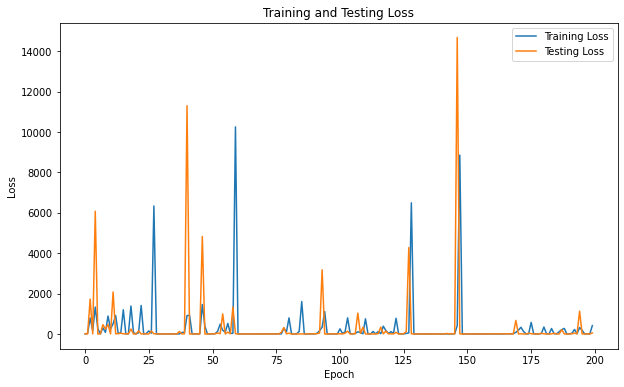

In [26]:
history=model.fit(X_train, y_train, epochs=200, batch_size=512, verbose=0,
                  validation_data=(X_test, y_test))
# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.savefig('./pm/training and testing loss.jpeg')
plt.show()

In [ ]:
########################################## Data Preparation for LSTM and BiLSTM #########################

In [27]:
df['Dust_log']=np.log(df['Dust'])

In [28]:
X=df[['Dust_log']]

In [30]:
y=df['PM2.5']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [32]:
# Reshape the input data to match LSTM layer input shape
train_data = np.resize(X_train, (X_train.shape[0], X_train.shape[1], 1))
test_data = np.resize(X_test, (X_test.shape[0], X_test.shape[1], 1))
train_labels=y_train
test_labels=y_test

# LSTM

Epoch 1/100
1492/1492 [==============================] - 11s 5ms/step - loss: 1498.6096 - val_loss: 1378.4686
Epoch 2/100
1492/1492 [==============================] - 7s 4ms/step - loss: 1250.4977 - val_loss: 1178.1987
Epoch 3/100
1492/1492 [==============================] - 6s 4ms/step - loss: 1071.1431 - val_loss: 1012.4410
Epoch 4/100
1492/1492 [==============================] - 7s 5ms/step - loss: 921.6774 - val_loss: 874.0193
Epoch 5/100
1492/1492 [==============================] - 7s 5ms/step - loss: 798.3925 - val_loss: 760.9540
Epoch 6/100
1492/1492 [==============================] - 7s 5ms/step - loss: 699.6313 - val_loss: 671.7227
Epoch 7/100
1492/1492 [==============================] - 7s 5ms/step - loss: 624.0768 - val_loss: 605.2213
Epoch 8/100
1492/1492 [==============================] - 6s 4ms/step - loss: 570.1254 - val_loss: 559.5552
Epoch 9/100
1492/1492 [==============================] - 6s 4ms/step - loss: 478.7547 - val_loss: 425.2201
Epoch 10/100
1492/1492 [======

1492/1492 [==============================] - 7s 5ms/step - loss: 5.6509 - val_loss: 5.6855
Epoch 79/100
1492/1492 [==============================] - 7s 4ms/step - loss: 5.5186 - val_loss: 5.5788
Epoch 80/100
1492/1492 [==============================] - 7s 4ms/step - loss: 5.4297 - val_loss: 5.4999
Epoch 81/100
1492/1492 [==============================] - 7s 4ms/step - loss: 5.3007 - val_loss: 5.4333
Epoch 82/100
1492/1492 [==============================] - 7s 5ms/step - loss: 5.2015 - val_loss: 5.7166
Epoch 83/100
1492/1492 [==============================] - 7s 4ms/step - loss: 5.0232 - val_loss: 5.2987
Epoch 84/100
1492/1492 [==============================] - 7s 4ms/step - loss: 4.9911 - val_loss: 5.0778
Epoch 85/100
1492/1492 [==============================] - 7s 4ms/step - loss: 4.8571 - val_loss: 5.4304
Epoch 86/100
1492/1492 [==============================] - 7s 4ms/step - loss: 4.7329 - val_loss: 4.8212
Epoch 87/100
1492/1492 [==============================] - 7s 5ms/step - loss:

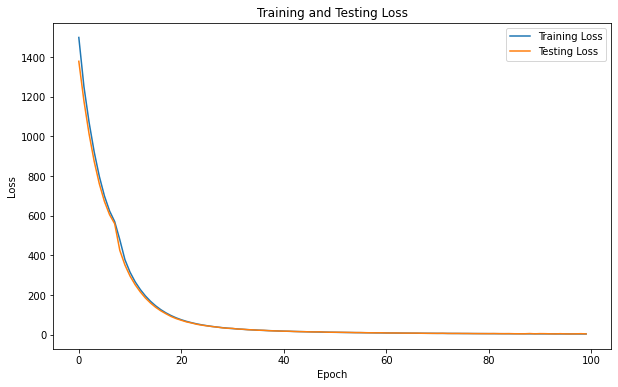

Evaluation Metrics LSTM:
Test MSE: 4.0025483084203755
Test RMSE: 2.000636975670593
Test MAE: 0.6973881554583498
Test R^2: 0.99218
Willmote Index: 0.95992


In [55]:
# Define LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(4, input_shape=(train_data.shape[1], train_data.shape[2]),return_sequences=True))  # LSTM layer with 64 units
    model.add(LSTM(2, return_sequences=True))
    model.add(Dense(1))
    return model



# Define evaluation metrics
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2
    
# Create and compile LSTM model
model = create_lstm_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
history=model.fit(train_data, train_labels, epochs=100, batch_size=32,
                  validation_data=(test_data, test_labels))
#cv_scores = cross_val_score(model, train_data, train_labels, cv=5, scoring=scoring)

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# Evaluate LSTM model on validation data
y_val_pred = model.predict(test_data)
y_val_pred = y_val_pred.reshape(y_val_pred.shape[0],y_val_pred.shape[1]*y_val_pred.shape[2])
mse, rmse, mae, r2 = evaluate_regression(test_labels, y_val_pred)


print("Evaluation Metrics LSTM:")
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test MAE:", mae)
print("Test R^2:", round(r2,5))
wi=willmott_index(y_test, np.reshape(y_val_pred,y_val_pred.shape[0]))
print("Willmote Index:", round(wi,5))

# BiLSTM

In [53]:
# Define BiLSTM model
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128), input_shape=(train_data.shape[1], train_data.shape[2])))
    model.add(Dense(1))
    return model

Epoch 1/100
1492/1492 [==============================] - 11s 5ms/step - loss: 463.4970 - val_loss: 316.0257
Epoch 2/100
1492/1492 [==============================] - 7s 5ms/step - loss: 186.4947 - val_loss: 102.1789
Epoch 3/100
1492/1492 [==============================] - 8s 5ms/step - loss: 87.8076 - val_loss: 81.7901
Epoch 4/100
1492/1492 [==============================] - 8s 5ms/step - loss: 76.8321 - val_loss: 72.0506
Epoch 5/100
1492/1492 [==============================] - 8s 5ms/step - loss: 70.3277 - val_loss: 66.2175
Epoch 6/100
1492/1492 [==============================] - 7s 5ms/step - loss: 65.1578 - val_loss: 63.2062
Epoch 7/100
1492/1492 [==============================] - 7s 5ms/step - loss: 60.7216 - val_loss: 57.2693
Epoch 8/100
1492/1492 [==============================] - 7s 5ms/step - loss: 56.4379 - val_loss: 56.6147
Epoch 9/100
1492/1492 [==============================] - 7s 5ms/step - loss: 52.5975 - val_loss: 49.3735
Epoch 10/100
1492/1492 [==========================

1492/1492 [==============================] - 7s 5ms/step - loss: 2.1103 - val_loss: 1.7422
Epoch 80/100
1492/1492 [==============================] - 7s 5ms/step - loss: 2.0205 - val_loss: 1.9835
Epoch 81/100
1492/1492 [==============================] - 7s 5ms/step - loss: 1.9500 - val_loss: 1.9488
Epoch 82/100
1492/1492 [==============================] - 7s 5ms/step - loss: 2.0119 - val_loss: 3.8665
Epoch 83/100
1492/1492 [==============================] - 7s 5ms/step - loss: 1.9374 - val_loss: 2.0638
Epoch 84/100
1492/1492 [==============================] - 7s 5ms/step - loss: 1.9426 - val_loss: 1.6310
Epoch 85/100
1492/1492 [==============================] - 7s 5ms/step - loss: 1.9499 - val_loss: 1.6183
Epoch 86/100
1492/1492 [==============================] - 7s 5ms/step - loss: 1.8501 - val_loss: 4.0326
Epoch 87/100
1492/1492 [==============================] - 7s 5ms/step - loss: 1.8853 - val_loss: 2.2853
Epoch 88/100
1492/1492 [==============================] - 7s 5ms/step - loss:

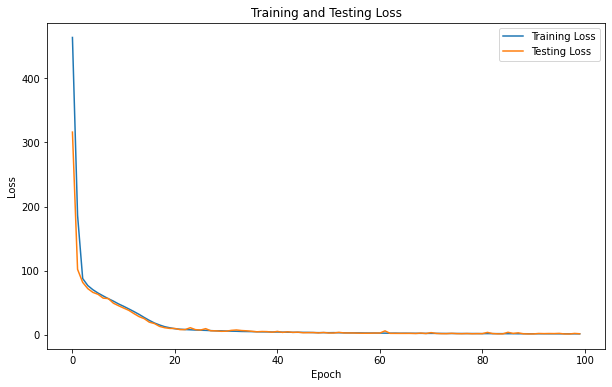

Evaluation Metrics LSTM:
Test MSE: 1.7292013174247212
Test RMSE: 1.3149909951876937
Test MAE: 0.6853544119681818
Test R^2: 0.99662
Willmote Index: 0.96061


In [54]:
# Create and compile BiLSTM model
model = create_bilstm_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
history=model.fit(train_data, train_labels, epochs=100, batch_size=32,
                  validation_data=(test_data, test_labels))
#cv_scores = cross_val_score(model, train_data, train_labels, cv=5, scoring=scoring)

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# Evaluate LSTM model on validation data
y_val_pred = model.predict(test_data)
#y_val_pred = y_val_pred.reshape(y_val_pred.shape[0],y_val_pred.shape[1]*y_val_pred.shape[2])
mse, rmse, mae, r2 = evaluate_regression(test_labels, y_val_pred)


print("Evaluation Metrics BiLSTM:")
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test MAE:", mae)
print("Test R^2:", round(r2,5))
wi=willmott_index(y_test, np.reshape(y_val_pred,y_val_pred.shape[0]))
print("Willmote Index:", round(wi,5))